In [1]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [3]:
df = pd.read_csv('jobs.csv')

In [7]:
# remove rows where 'Technology' is missing or empty
df = df.dropna(subset=['Technology'])
df = df[df['Technology'].str.strip() != '']

In [8]:
# set up a function to clean up delimiters in the 'Technology' column
def clean_delimiters(text):
    # Replace semicolons, slashes, 'and', etc., with commas
    text = re.sub(r'[;/&\n\t]| and | with | in ', ',', str(text))
    # delete extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


In [9]:
# apply the function to clean up the 'Technology' column
df['Technology'] = df['Technology'].apply(clean_delimiters)

In [10]:
# split 'Technology' entries into lists and remove any extra spaces
df['Technology_List'] = df['Technology'].apply(lambda x: [tech.strip() for tech in x.split(',') if tech.strip()])

In [11]:
# move everything into big list, and make everything lowercase
all_technologies = [tech.lower() for sublist in df['Technology_List'] for tech in sublist]


In [12]:
# dictionary to standardize technology names
mapping = {
    'c++': 'C++',
    'c#': 'C#',
    'java': 'Java',
    'javascript': 'JavaScript',
    'js': 'JavaScript',
    'python': 'Python',
    'node.js': 'Node.js',
    'nodejs': 'Node.js',
    'react': 'React',
    'angular': 'Angular',
    'vuejs': 'Vue.js',
    'golang': 'Go',
}

In [13]:
# make sure all technology names are consistent
standardized_technologies = [mapping.get(tech, tech.title()) for tech in all_technologies if tech]


In [14]:
# count how often each technology shows up and put it in a DF
technology_counts = Counter(standardized_technologies)
technology_df = pd.DataFrame(technology_counts.items(), columns=['Technology', 'Count'])

In [15]:
# remove any rows in technology_df where 'Technology' is missing or empty
technology_df = technology_df.dropna(subset=['Technology'])
technology_df = technology_df[technology_df['Technology'] != '']


In [16]:
print("Checking for any missing values in technology_df after processing:")
print(technology_df[technology_df['Technology'].isna()])

Checking for any missing values in technology_df after processing:
Empty DataFrame
Columns: [Technology, Count]
Index: []


In [17]:
# sort by count, from most to least mentions
technology_df = technology_df.sort_values('Count', ascending=False).reset_index(drop=True)

In [18]:
# set the style for the plot
sns.set(style="whitegrid")

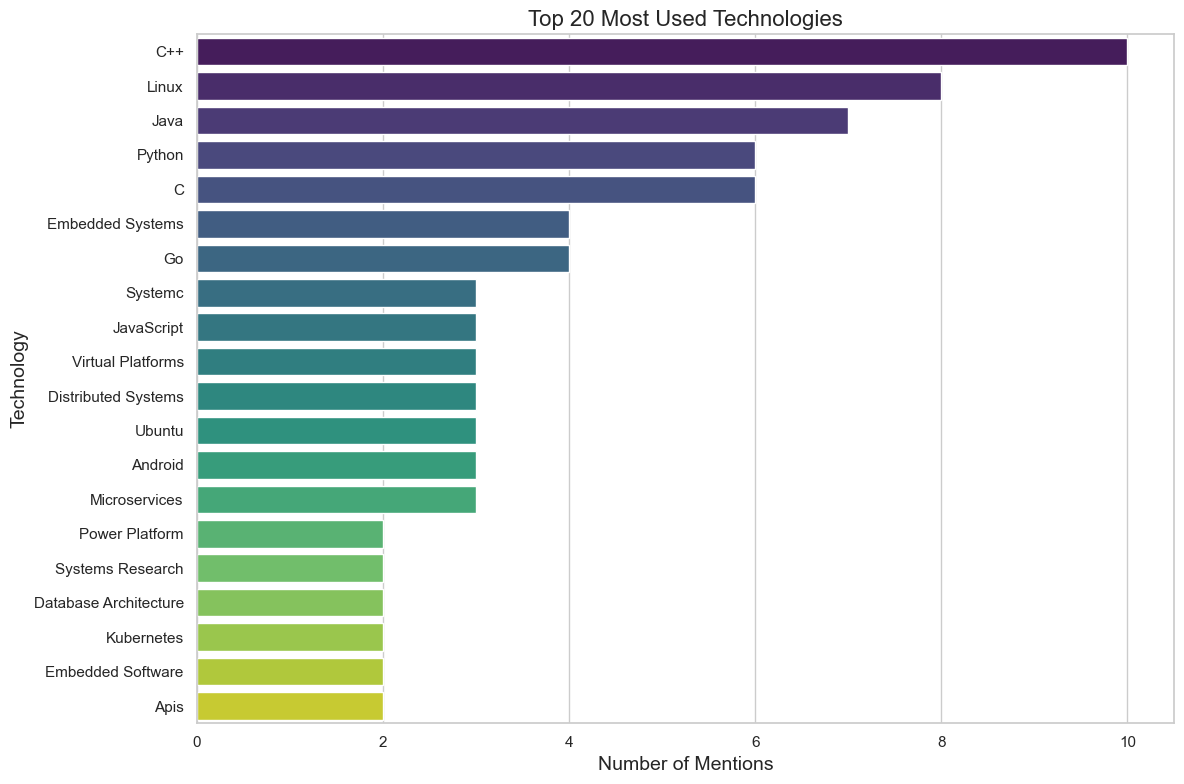

In [19]:
# plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Technology', data=technology_df.head(20), hue='Technology', palette='viridis', dodge=False, legend=False)
plt.title('Top 20 Most Used Technologies', fontsize=16)
plt.xlabel('Number of Mentions', fontsize=14)
plt.ylabel('Technology', fontsize=14)
plt.tight_layout()
plt.show()